In [1]:
#Logistic Regression on South African Dataset

In [99]:
#Load the packages 
import numpy as np
import pandas as pd
import requests
import io
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
sns.set_style("whitegrid")
from mlxtend.plotting import plot_learning_curves
%matplotlib inline



In [74]:
url="http://math.mercyhurst.edu/~sousley/STAT_139/data/sahdd.csv"
c=pd.read_csv(url)

In [75]:
c.head()

,row,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [76]:
#Converts Present and Absent into numbers.
c['famhist'] = c['famhist'].apply(lambda x:0 if x=="Absent" else 1)

In [77]:
c['famhist'].head()

0    1
1    0
2    1
3    1
4    1
Name: famhist, dtype: int64

In [78]:
c.mean()

row          231.935065
sbp          138.326840
tobacco        3.635649
ldl            4.740325
adiposity     25.406732
famhist        0.415584
typea         53.103896
obesity       26.044113
alcohol       17.044394
age           42.816017
chd            0.346320
dtype: float64

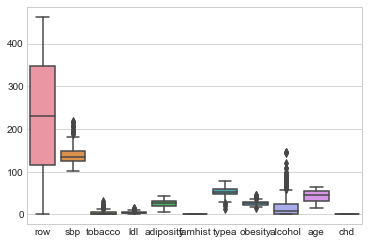

In [79]:

sns.boxplot(data=c)

In [80]:
def reject_outliers(sr, iq_range=0.5):
    pcnt = (1 - iq_range) / 2
    qlow, median, qhigh = sr.dropna().quantile([pcnt, 0.50, 1-pcnt])
    iqr = qhigh - qlow
    return sr[ (sr - median).abs() <= iqr]

In [81]:
newsbp = reject_outliers(c['sbp'])

In [82]:
newtobacco = reject_outliers(c['tobacco'])

In [83]:
newldl = reject_outliers(c['ldl'])

In [84]:
newadiposity = reject_outliers(c['adiposity'])

In [85]:
newtypea= reject_outliers(c['typea'])

In [86]:
newobesity = reject_outliers(c['obesity'])

In [87]:
newalcohol = reject_outliers(c['alcohol'])

In [88]:
row = c['row']
famhist=c['famhist']
age=c['age']
chd=c['chd']
# You will notice each column has varying length because each col had diff no of outliers.
#Okay so first convert them to list and then to dataframe

d=[row, newsbp, newtobacco, newldl, newadiposity, famhist, newtypea, newobesity, newalcohol, age, chd]
newc = pd.DataFrame(d)

In [89]:
newc.head()
#Replace the NaN with col means 

,0,1,2,3,4,5,6,7,8,9,...,452,453,454,455,456,457,458,459,460,461
row,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,...,454.00,455.0,456.00,457.00,458.00,459.00,460.00,461.00,462.00,463.00
sbp,NaN,144.00,118.00,NaN,134.00,132.00,142.00,114.00,114.00,132.00,...,154.00,124.0,146.00,128.00,NaN,NaN,NaN,NaN,118.00,132.00
tobacco,NaN,0.01,0.08,NaN,NaN,6.20,4.05,4.08,0.00,0.00,...,5.53,1.6,0.64,2.24,0.40,0.40,4.20,3.00,5.40,0.00
ldl,5.73,4.41,3.48,6.41,3.50,6.47,3.38,4.59,3.83,5.80,...,3.20,NaN,4.82,2.83,4.11,5.98,4.41,NaN,NaN,4.82
adiposity,23.11,28.61,32.28,NaN,27.78,36.21,16.20,NaN,19.40,30.96,...,28.81,NaN,28.02,26.48,NaN,31.72,32.10,15.23,30.79,33.41


In [90]:
newc.fillna(newc.mean())

,0,1,2,3,4,5,6,7,8,9,...,452,453,454,455,456,457,458,459,460,461
row,1.0000,2.00,3.00,4.00,5.000000,6.00,7.00,8.00,9.00,10.000,...,454.000,455.000000,456.00,457.000,458.00000,459.000,460.000,461.00000,462.000,463.000
sbp,19.7675,144.00,118.00,20.81,134.000000,132.00,142.00,114.00,114.00,132.000,...,154.000,124.000000,146.00,128.000,72.32125,64.755,65.304,75.10875,118.000,132.000
tobacco,19.7675,0.01,0.08,20.81,34.141111,6.20,4.05,4.08,0.00,0.000,...,5.530,1.600000,0.64,2.240,0.40000,0.400,4.200,3.00000,5.400,0.000
ldl,5.7300,4.41,3.48,6.41,3.500000,6.47,3.38,4.59,3.83,5.800,...,3.200,90.514286,4.82,2.830,4.11000,5.980,4.410,75.10875,77.151,4.820
adiposity,23.1100,28.61,32.28,20.81,27.780000,36.21,16.20,28.25,19.40,30.960,...,28.810,90.514286,28.02,26.480,72.32125,31.720,32.100,15.23000,30.790,33.410
famhist,1.0000,0.00,1.00,1.00,1.000000,1.00,0.00,1.00,1.00,1.000,...,1.000,1.000000,0.00,0.000,1.00000,0.000,0.000,0.00000,0.000,1.000
typea,49.0000,55.00,52.00,51.00,60.000000,62.00,59.00,62.00,49.00,26.387,...,61.000,90.514286,60.00,48.000,56.00000,64.000,52.000,40.00000,64.000,62.000
obesity,25.3000,28.87,29.14,20.81,25.990000,30.77,20.81,23.11,24.86,30.110,...,26.150,90.514286,28.11,23.960,72.32125,28.450,28.610,75.10875,27.350,74.323
alcohol,19.7675,2.06,3.81,24.26,34.141111,14.14,2.62,6.72,2.49,0.000,...,77.569,0.000000,8.23,71.651,2.06000,0.000,18.720,26.64000,23.970,0.000
age,52.0000,63.00,46.00,58.00,49.000000,45.00,38.00,58.00,29.00,53.000,...,42.000,51.000000,39.00,27.000,57.00000,58.000,52.000,55.00000,40.000,46.000


In [91]:
newc2 = newc.transpose()

In [92]:
newc2.head()

,row,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1.0,NaN,NaN,5.73,23.11,1.0,49.0,25.30,NaN,52.0,1.0
1,2.0,144.0,0.01,4.41,28.61,0.0,55.0,28.87,2.06,63.0,1.0
2,3.0,118.0,0.08,3.48,32.28,1.0,52.0,29.14,3.81,46.0,0.0
3,4.0,NaN,NaN,6.41,NaN,1.0,51.0,NaN,24.26,58.0,1.0
4,5.0,134.0,NaN,3.50,27.78,1.0,60.0,25.99,NaN,49.0,1.0


In [93]:
df=newc2.fillna(newc2.mean())
df.head()

,row,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1.0,132.386667,2.046967,5.73,23.11000,1.0,49.0,25.300000,7.385239,52.0,1.0
1,2.0,144.000000,0.010000,4.41,28.61000,0.0,55.0,28.870000,2.060000,63.0,1.0
2,3.0,118.000000,0.080000,3.48,32.28000,1.0,52.0,29.140000,3.810000,46.0,0.0
3,4.0,132.386667,2.046967,6.41,26.50301,1.0,51.0,25.647608,24.260000,58.0,1.0
4,5.0,134.000000,2.046967,3.50,27.78000,1.0,60.0,25.990000,7.385239,49.0,1.0


In [94]:
df['row']= df['row'].astype(np.int64)
df['famhist']=df['famhist'].astype(np.int64)
df['chd']= df['chd'].astype(np.int64)
df.head()

,row,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,132.386667,2.046967,5.73,23.11000,1,49.0,25.300000,7.385239,52.0,1
1,2,144.000000,0.010000,4.41,28.61000,0,55.0,28.870000,2.060000,63.0,1
2,3,118.000000,0.080000,3.48,32.28000,1,52.0,29.140000,3.810000,46.0,0
3,4,132.386667,2.046967,6.41,26.50301,1,51.0,25.647608,24.260000,58.0,1
4,5,134.000000,2.046967,3.50,27.78000,1,60.0,25.990000,7.385239,49.0,1


In [95]:
#Now it's time to do a train test split, and train our model!

#Split the data into training set and testing set using train_test_split

from sklearn.model_selection import train_test_split

X = df[['sbp', 'tobacco', 'ldl','adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']]

y = df['chd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [96]:
#Train and fit a logistic regression model on the training set.

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [97]:
#Predictions and Evaluations

#Now predict values for the testing data.

predictions = logmodel.predict(X_test)

In [101]:
#Create a classification report for the model.
#Let's print classification report
print("\n Classification report is as follows: \n ")
print(classification_report(y_test,predictions))
#Calculate f-1 score
print("\n f-1 socre is \n")
print(f1_score(y_test, predictions, average="macro"))
#Calculate precision score
print("\n Precision score is \n")
print(precision_score(y_test, predictions, average="macro"))
#Calculate recall score
print("\n Recall socre is \n")
print(recall_score(y_test, predictions, average="macro"))
print("\n Accuracy score is \n")
print(metrics.accuracy_score(y_test, predictions))



 Classification report is as follows: 
 
             precision    recall  f1-score   support

          0       0.73      0.88      0.80        97
          1       0.68      0.45      0.54        56

avg / total       0.71      0.72      0.70       153


 f-1 socre is 

0.667878237165

 Precision score is 

0.704217148183

 Recall socre is 

0.661358615611

 Accuracy score is 

0.718954248366


([0.16666666666666666,
  0.26229508196721313,
  0.2608695652173913,
  0.26016260162601629,
  0.27272727272727271,
  0.30810810810810813,
  0.27777777777777779,
  0.291497975708502,
  0.30215827338129497,
  0.29126213592233008],
 [0.5163398692810458,
  0.40522875816993464,
  0.34640522875816993,
  0.30065359477124182,
  0.3202614379084967,
  0.30718954248366015,
  0.31372549019607843,
  0.29411764705882354,
  0.30718954248366015,
  0.28104575163398693])

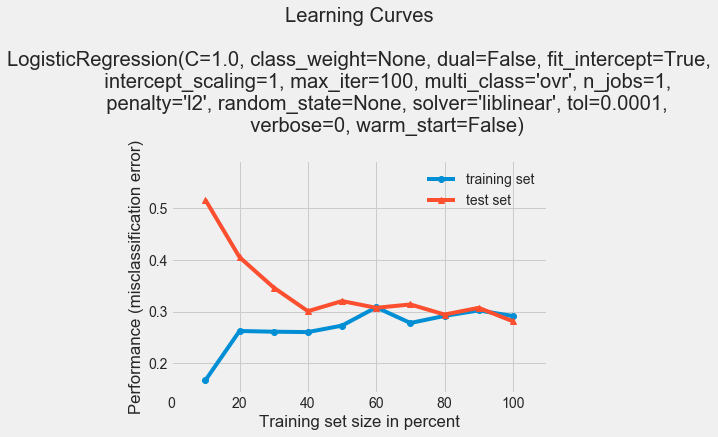

In [46]:
plot_learning_curves(X_train, y_train, X_test, y_test, logmodel)


In [31]:
# Let's apply K nearest neighbour 

In [49]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [102]:
predictionsknn = knn.predict(X_test)
#Let's print classification report
print("\n Classification report is as follows: \n ")
print(classification_report(y_test,predictionsknn))
#Calculate f-1 score
print("\n f-1 socre is \n")
print(f1_score(y_test, predictionsknn, average="macro"))
#Calculate precision score
print("\n Precision score is \n")
print(precision_score(y_test, predictionsknn, average="macro"))
#Calculate recall score
print("\n Recall socre is \n")
print(recall_score(y_test, predictionsknn, average="macro"))
print("\n Accuracy score is \n")
print(metrics.accuracy_score(y_test, predictionsknn))


 Classification report is as follows: 
 
             precision    recall  f1-score   support

          0       0.67      0.63      0.65        97
          1       0.42      0.46      0.44        56

avg / total       0.58      0.57      0.57       153


 f-1 socre is 

0.544807068157

 Precision score is 

0.54484225452

 Recall socre is 

0.546575846834

 Accuracy score is 

0.56862745098


([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.37254901960784315,
  0.41830065359477125,
  0.46405228758169936,
  0.46405228758169936,
  0.47058823529411764,
  0.44444444444444442,
  0.43790849673202614,
  0.45098039215686275,
  0.42483660130718953,
  0.43137254901960786])

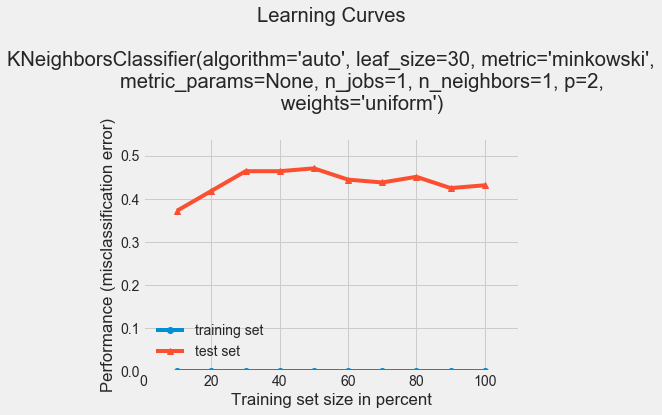

In [104]:
plot_learning_curves(X_train, y_train, X_test, y_test, knn)


In [117]:
k_range = range(1, 40)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 40
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)



[0.56862745098039214, 0.56862745098039214, 0.54248366013071891, 0.56209150326797386, 0.57516339869281041, 0.54248366013071891, 0.56862745098039214, 0.5816993464052288, 0.6143790849673203, 0.63398692810457513, 0.62091503267973858, 0.65359477124183007, 0.62745098039215685, 0.6143790849673203, 0.62091503267973858, 0.6470588235294118, 0.62091503267973858, 0.63398692810457513, 0.63398692810457513, 0.64052287581699341, 0.64052287581699341, 0.6470588235294118, 0.63398692810457513, 0.65359477124183007, 0.63398692810457513, 0.66013071895424835, 0.66666666666666663, 0.67320261437908502, 0.66013071895424835, 0.66013071895424835, 0.66666666666666663, 0.63398692810457513, 0.63398692810457513, 0.62745098039215685, 0.63398692810457513, 0.63398692810457513, 0.63398692810457513, 0.63398692810457513, 0.63398692810457513]


In [125]:
dic = [k_range, scores]
df = pd.DataFrame(np.array(dic))
df.head()
df=df.transpose()
df.head()

,0,1
0,1.0,0.568627
1,2.0,0.568627
2,3.0,0.542484
3,4.0,0.562092
4,5.0,0.575163


In [129]:
#Let's change col names 
df.columns=['K-range', 'Accuracy Score']
df.head()

,K-range,Accuracy Score
0,1.0,0.568627
1,2.0,0.568627
2,3.0,0.542484
3,4.0,0.562092
4,5.0,0.575163


Text(0,0.5,'Testing Accuracy')

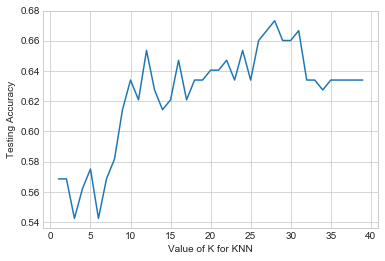

In [108]:

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN', )
plt.ylabel('Testing Accuracy')

In [111]:
#We will change the x axis values i.e. (ticks) with the difference of 1 so that we will accurately know what the accuracy is.

([<matplotlib.axis.XTick at 0x1f23bfeaf60>,
 <a list of 39 Text xticklabel objects>)

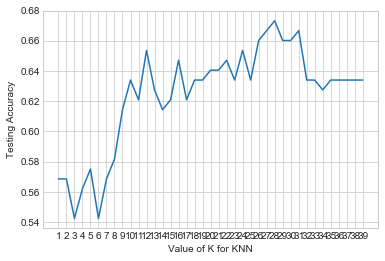

In [113]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN', )
plt.ylabel('Testing Accuracy')
plt.xticks(k_range)

In [114]:
#Okay but it is sill not clear let's increase size 

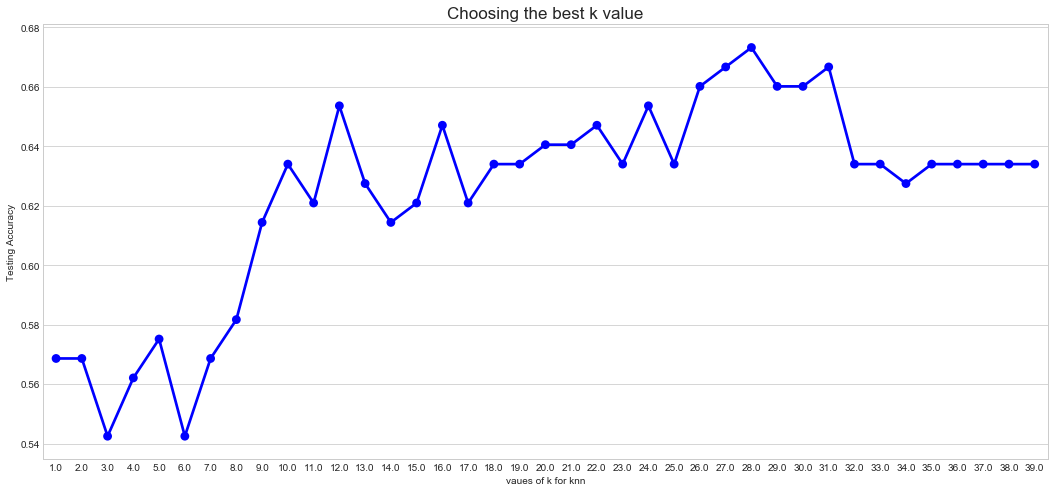

In [134]:

fig, ax = plt.subplots(figsize=(18,8))
ax = sns.pointplot(x = 'K-range', y = 'Accuracy Score', data = df, color = 'blue')
ax.set(xlabel = 'vaues of k for knn', ylabel = 'Testing Accuracy')
plt.title("Choosing the best k value",fontsize=17)
plt.show()